In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request


import ssl
ssl.create_default_https_context = ssl._create_unverified_context


#url = "https://en.wikipedia.org/wiki/1999%E2%80%932000_FA_Premier_League"
url = "https://en.wikipedia.org/wiki/Median_income"
page = urllib.request.urlopen(url)

soup = BeautifulSoup(page,"lxml")


In [2]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Median income - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"206c0776-3295-46aa-98d3-07ad98d2e5f1","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Median_income","wgTitle":"Median income","wgCurRevisionId":1051964688,"wgRevisionId":1051964688,"wgArticleId":2021534,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Pages using multiple image with auto scaled images","Lists of co

In [3]:
soup.title
soup.title.string


'Median income - Wikipedia'

In [4]:
all_sortable_tables = soup.find_all('table', class_='sortable wikitable')

all_sortable_tables

[<table class="sortable wikitable">
 <tbody><tr>
 <th>Rank
 </th>
 <th>Country
 </th>
 <th>Median income 2010 (US$, <a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">PPP</a>)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </th>
 <th>Year
 </th></tr>
 <tr>
 <td>1</td>
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" width="23"/> </span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
 <td>43,708</td>
 <td>2018
 </td></tr>
 <tr>
 <td>2</td>
 <td align="left"><span class="flagicon"><img

In [5]:
table2 = soup.find("table", class_="multicol")

table2



<table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:100%;">
<tbody><tr>
<td style="text-align: left; vertical-align: top;">
<table class="sortable wikitable">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>Median income 2010 (US$, <a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">PPP</a>)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Year
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x

In [6]:
for row in table2.find_all("tr"):

    cells = row.find_all("td")

    print(len(cells))

    for column in cells:
        
        print(column)


177
<td style="text-align: left; vertical-align: top;">
<table class="sortable wikitable">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>Median income 2010 (US$, <a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">PPP</a>)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Year
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" width="23"/> </span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
<td>43,708</td>
<td>2018
</td></tr>
<tr>
<td>2</td>
<td ali

In [7]:
A = []

B = []

C = []


for row in table2.find_all("tr"):

    cells = row.find_all("td")

    if len(cells) == 4:

        mlnk = cells[1].find_all("a")

        if len(mlnk) > 0:

            A.append(mlnk[0])

            B.append(cells[2].find(text=True))

            C.append(cells[3].find(text=True))


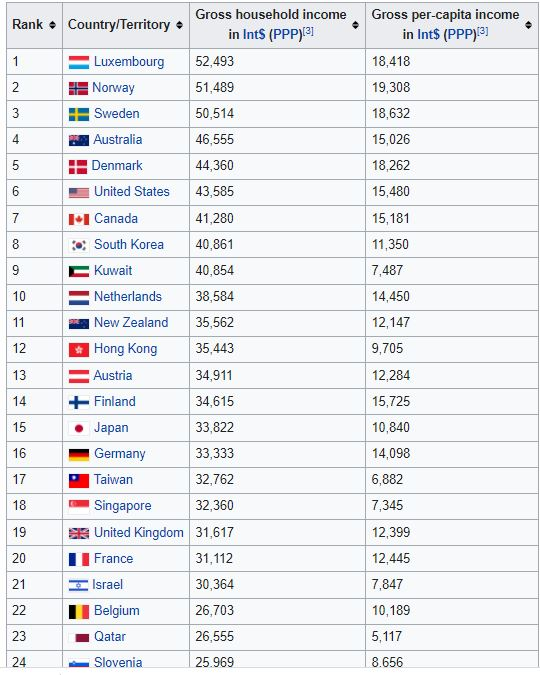

In [8]:
from IPython.display import Image
Image("perCapita_income.jpg")

In [9]:
import pandas as pd


df = pd.DataFrame(A, columns=["Country/Territory"])

df["Gross household income"] = B

df["Gross per-capita income"] = C
df = df.replace('\n','', regex=True)

df.head(10)



,Country/Territory,Gross household income,Gross per-capita income
0,Luxembourg,"43,708",2018
1,Norway,"39,670",2018
2,Switzerland,"37,852",2017
3,Canada,"36,656",2019
4,United States,"35,600",2017
5,Iceland,"34,316",2017
6,Austria,"34,069",2018
7,Australia,"33,391",2018
8,Belgium,"32,493",2018
9,Sweden,"31,876",2019


In [11]:
df.to_csv("CSC221_webscrape_data.csv")
df

,Country/Territory,Gross household income,Gross per-capita income
0,Luxembourg,"43,708",2018
1,Norway,"39,670",2018
2,Switzerland,"37,852",2017
3,Canada,"36,656",2019
4,United States,"35,600",2017
5,Iceland,"34,316",2017
6,Austria,"34,069",2018
7,Australia,"33,391",2018
8,Belgium,"32,493",2018
9,Sweden,"31,876",2019
